# Projected PCA

In [1]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

import os

from seq_utils import letters_to_nums, sequences_from_fasta, one_hot_seq_batch
from PCA_func import plot_projected_pca, plot_pca_of_sequences, plot_two_pca_side_by_side, plot_projected_pca_mult

Target PCA coordinates: [17.  5.]


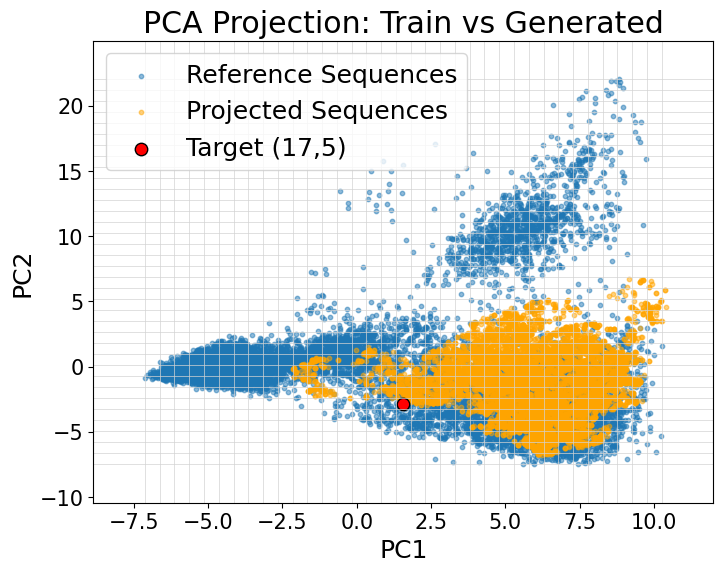

In [2]:
"""
    One-hot encode AA sequences - plm generated and true
"""
# -------------- Load generated sequences ----------------
file_dir='generated_sequencesPCA_comp17_5_'
filename = 'gen_seqs_w_init_seq_Ns15000_r0.4_b1PCA_comp'

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 5000
Nf = 30000
gen_sequences = gen_sequences[Ni:Nf]


# -------------- Load train sequences ----------------
# Load train sequences
family = 'jdoms_bacteria_train2'

wd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI'
filename = wd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

#filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'

train_sequences = sequences_from_fasta(filename)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string
if len(match) >= 2:
    target_coords = np.array([float(match[-2]), float(match[-1])])
    print(f"Target PCA coordinates: {target_coords}")
else:
    raise ValueError("Could not extract two PCA coordinates from file_dir name.")
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)

#plot_pca_of_sequences(train_sequences, title="PCA of Generated Sequences")

## Model 1: target at (17,5), different betas

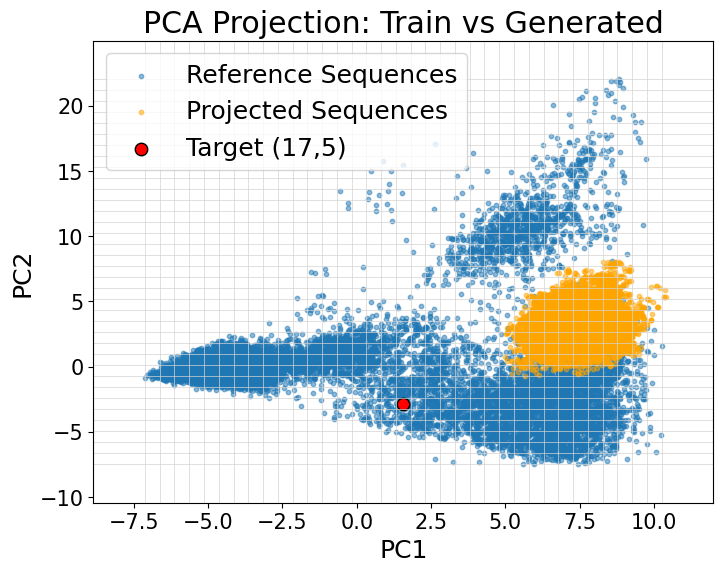

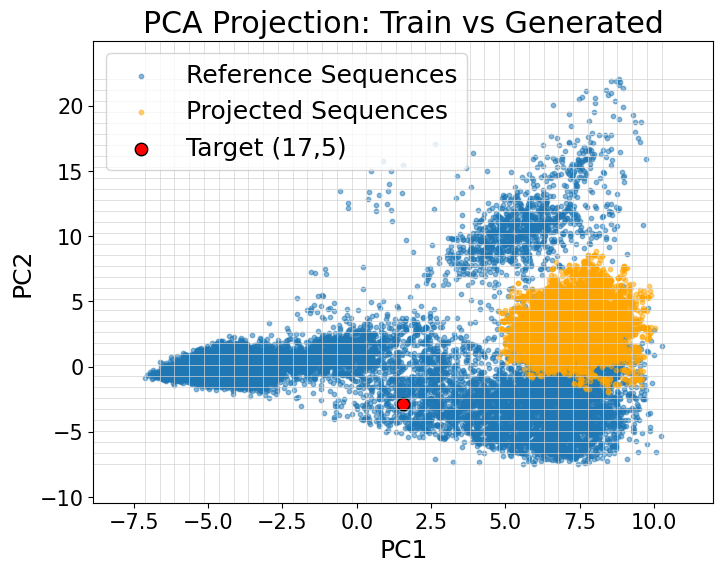

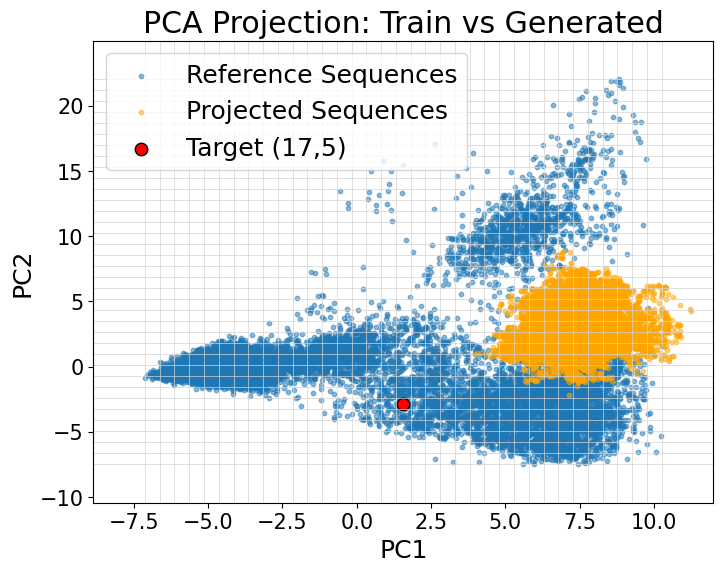

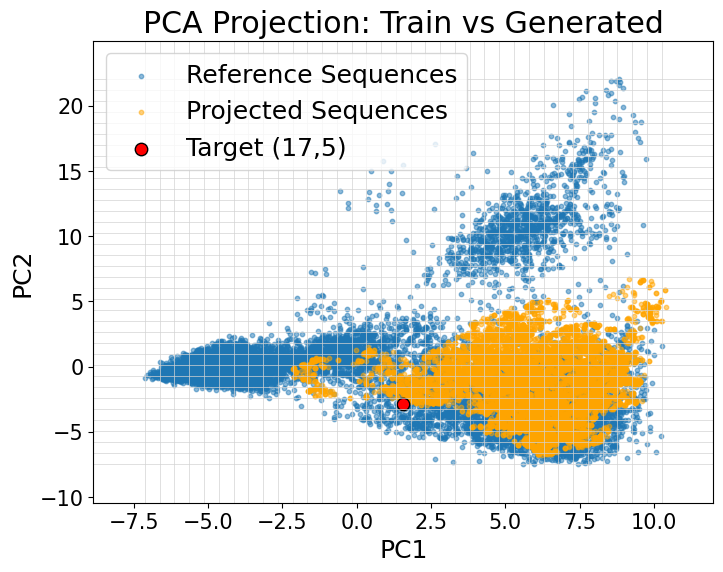

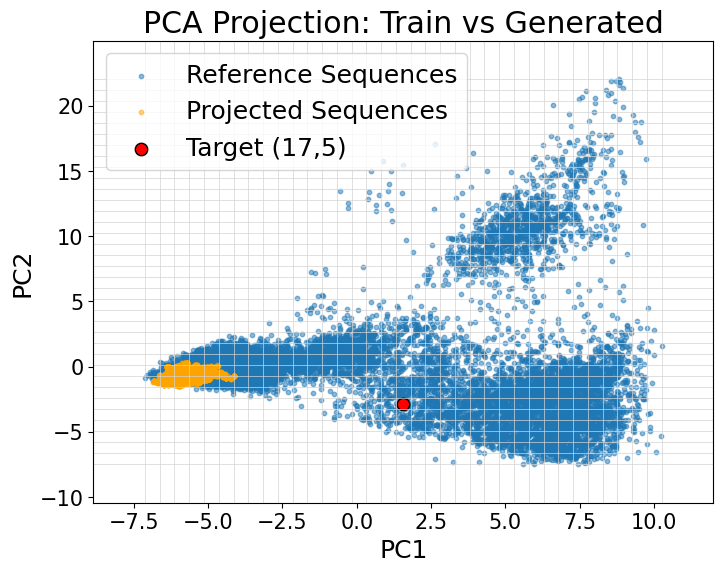

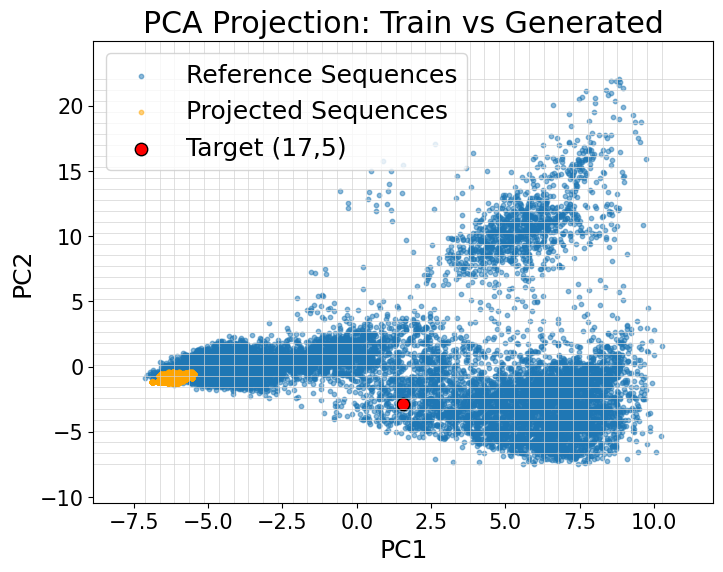

In [5]:
# -------------- Load train sequences ----------------
# Load train sequences
family = 'jdoms_bacteria_train2'

wd = '/Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI'
filename = wd + f'/CODE/DataAttentionDCA/jdoms/{family}.fasta'

#filename = cwd + f'\CODE\DataAttentionDCA\jdoms\{family}.fasta'

train_sequences = sequences_from_fasta(filename)
train_sequences_num = [letters_to_nums(seq) for seq in train_sequences]

#----------- Plot PCA of train sequences-----------------

betas = [0.01, 0.1, 0.5, 1, 2, 4]
file_dir='generated_sequencesPCA_comp17_5_'
filenames = [f'gen_seqs_w_init_seq_Ns15000_r0.4_b{beta}PCA_comp' for beta in betas]

cwd = os.getcwd()

for filename in filenames:
    # Load the generated sequences
    output_file = cwd + f'/{file_dir}/{filename}.npy'
    gen_sequences = np.load(output_file)
    saved_seq = gen_sequences.copy()
    # remove last two columns (PCA coords)
    gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
    Ni = 5000
    Nf = 30000
    gen_sequences = gen_sequences[Ni:Nf]
    
    plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)



## Model 1: target (20,20)

Target PCA coordinates: [20. 20.]


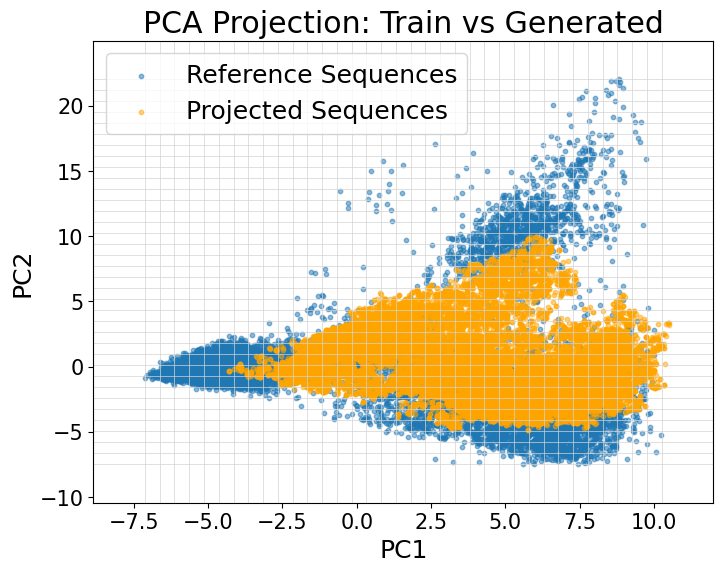

In [14]:
file_dir='generated_sequencesPCA_comp20_20_'
filename = 'generated_sequences_randinit_30000PCA_comp'

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 5000
Nf = 30000
gen_sequences = gen_sequences[Ni:Nf]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string
if len(match) >= 2:
    target_coords = np.array([float(match[-2]), float(match[-1])])
    print(f"Target PCA coordinates: {target_coords}")
else:
    raise ValueError("Could not extract two PCA coordinates from file_dir name.")
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35)

## Model 2: no target, Ns15000, betas

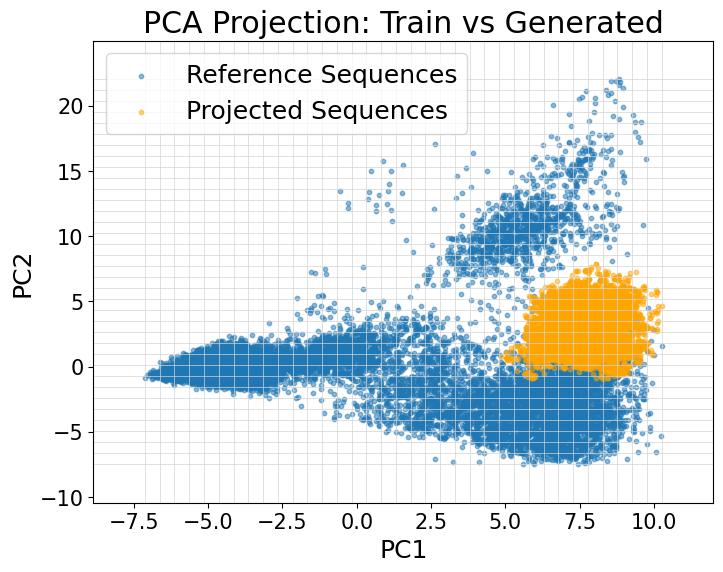

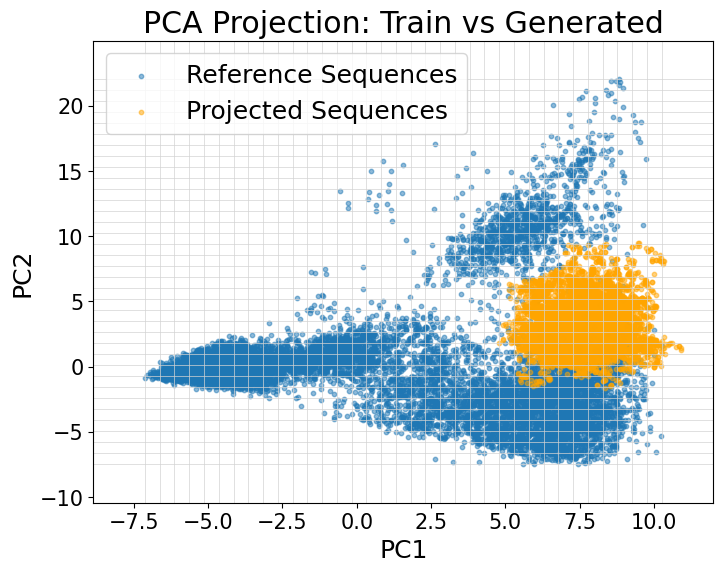

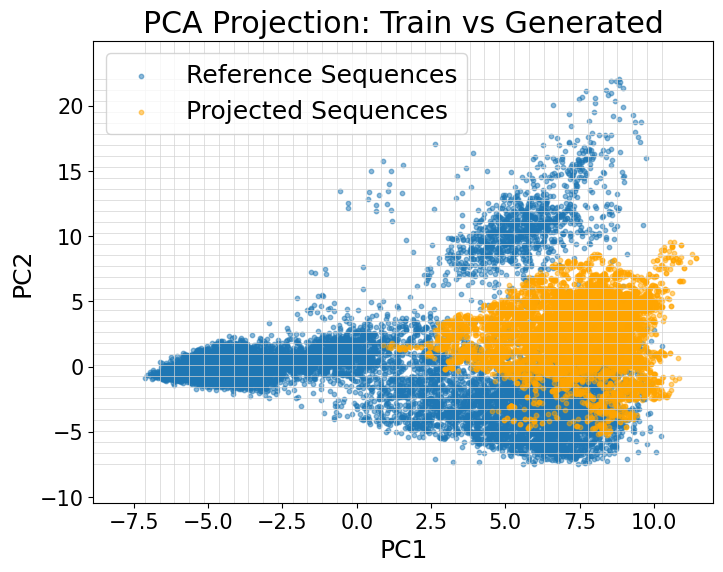

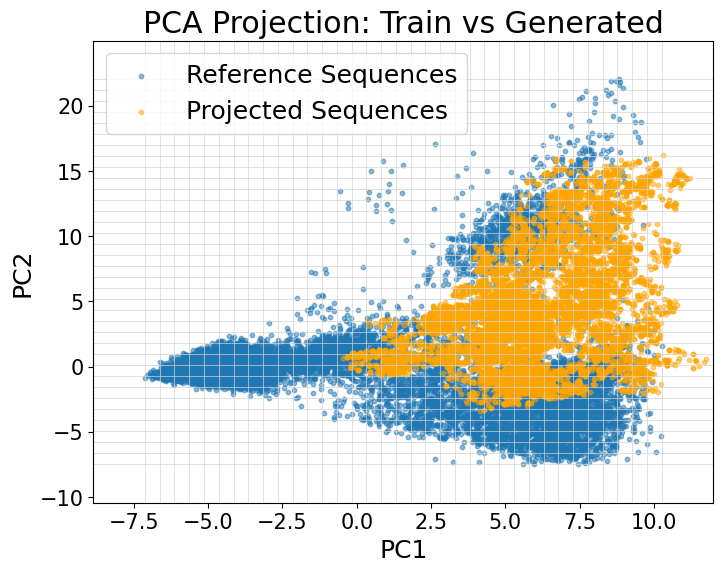

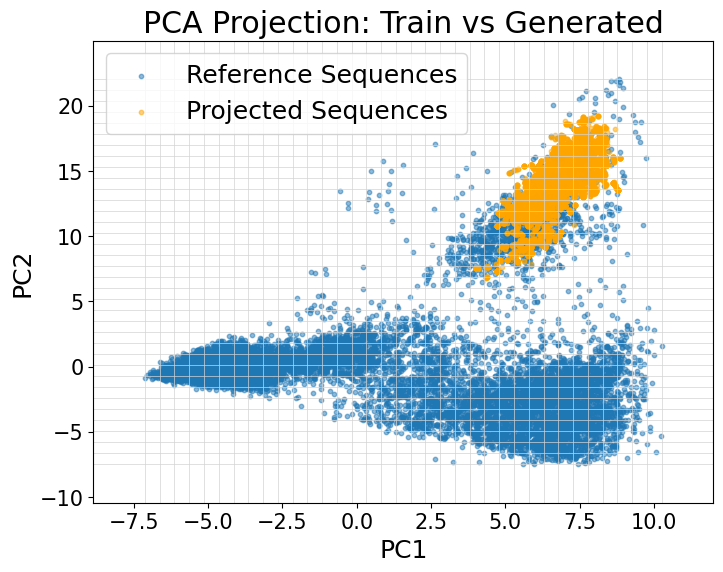

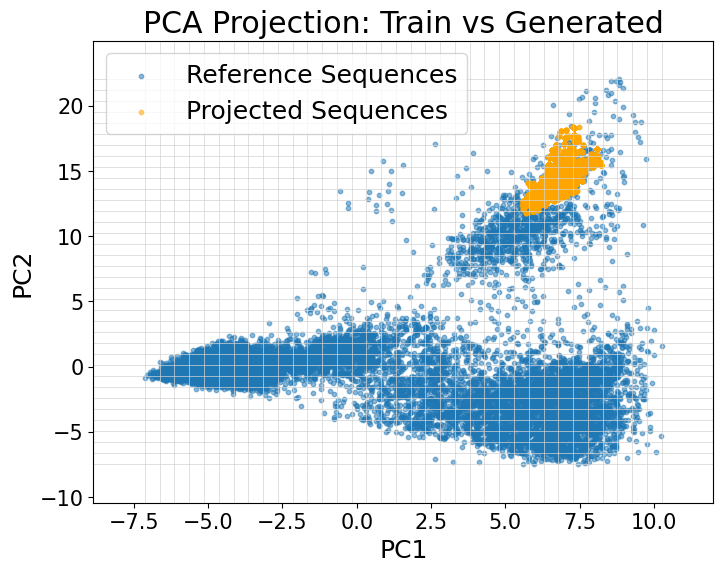

In [15]:
file_dir='generated_sequences_2Model_PCAPCA_comp'
betas = [0.01, 0.1, 0.5, 1, 2, 4]
filenames = [f'gen_seqs_w_init_seq_Ns15000_r0.4_b{beta}PCA_comp' for beta in betas]
cwd = os.getcwd()

for filename in filenames:
    # Load the generated sequences
    output_file = cwd + f'/{file_dir}/{filename}.npy'
    gen_sequences = np.load(output_file)
    saved_seq = gen_sequences.copy()
    # remove last two columns (PCA coords)
    gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
    Ni = 5000
    Nf = 30000
    gen_sequences = gen_sequences[Ni:Nf]
    
    plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35)


## Model 2: target at (20,20), Ns30000

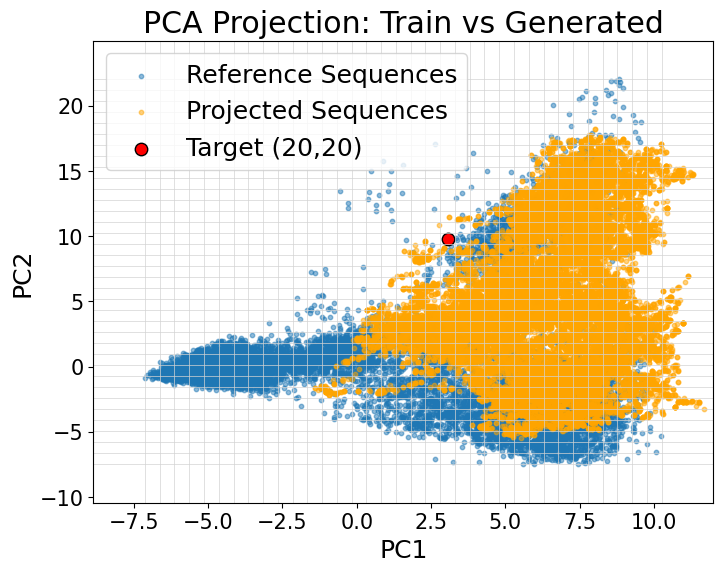

In [22]:
file_dir='generated_sequences_2Model_PCAPCA_comp'
filename = 'gen_seqs_w_init_seq_Ns30000_r0.4PCA_comp'

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 100
Nf = 30000
gen_sequences = gen_sequences[Ni:Nf]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string

target_coords = [(20, 20)]
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)

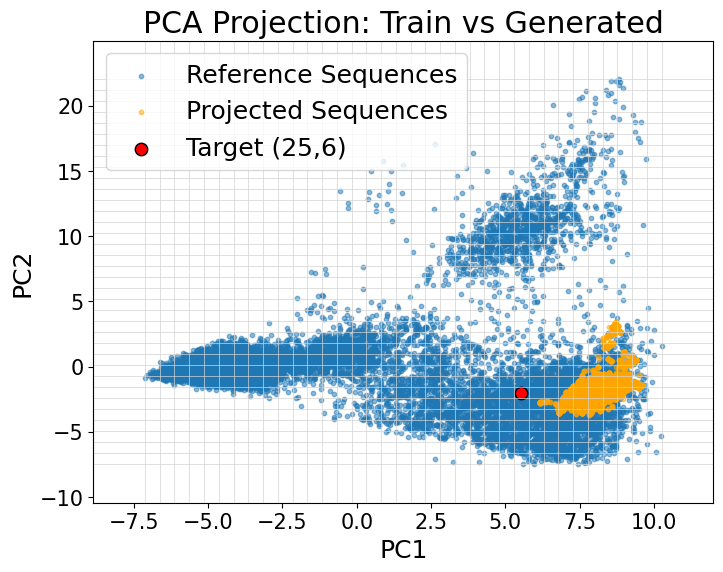

In [51]:
file_dir='generated_sequences_2Model_PCAPCA_comp'
filename = 'generated_sequences_randinit_30000_25_6PCA_comp'

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 1000
Nf = 5000
gen_sequences = gen_sequences[Ni:Nf]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string

target_coords = [(25, 6)]
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)

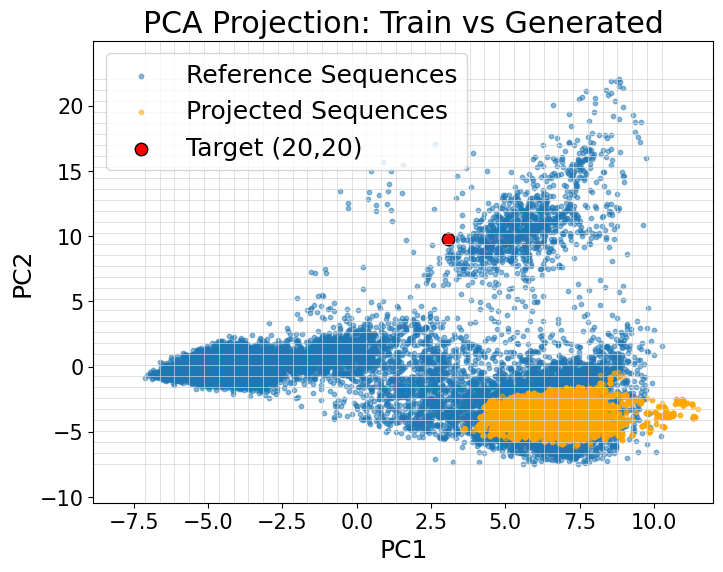

In [40]:
file_dir='generated_sequences_2Model_PCAPCA_comp'
filename = f"gen_seqs_w_init_seq_Ns15000_r0.4_20_20PCA_comp"

cwd = os.getcwd()

# Load the generated sequences
output_file = cwd + f'/{file_dir}/{filename}.npy'
#output_file = cwd + f'\CODE\AttentionDCA_python\src\PLM\{file_dir}\{filename}.npy'
gen_sequences = np.load(output_file)
saved_seq = gen_sequences.copy()
# remove last two columns (PCA coords)
gen_sequences = gen_sequences[:, :-2]  # Assuming the last two columns are PCA coordinates
Ni = 1000
Nf = 20000
gen_sequences = gen_sequences[Ni:Nf]

# take target coords from name file_dir - last two numbers
import re
# Extract target PCA coordinates from file_dir string
match = re.findall(r'\d+', file_dir[-10:])  # Only search at end of string

target_coords = [(20, 20)]
plot_projected_pca(sequences_reference=train_sequences, sequences_to_project=gen_sequences, title="PCA Projection: Train vs Generated", Nbins=35, target_coords=target_coords)

## Multiple

In [10]:
def load_all_generated_sequences_recursive(base_dir):
    """
    Recursively loads all .npy files in base_dir and subdirectories,
    removes last 2 PCA columns, and returns a list of sequences and filenames.
    """
    gen_sequences_list = []
    file_names = []

    for root, _, files in os.walk(base_dir):
        for fname in files:
            if fname.endswith(".npy"):
                full_path = os.path.join(root, fname)
                try:
                    data = np.load(full_path)
                    if data.shape[1] >= 2:
                        sequences = data #data[:, :-2]  # Remove PCA columns
                    else:
                        sequences = data
                    gen_sequences_list.append(sequences)
                    file_names.append(fname)
                except Exception as e:
                    print(f"Failed to load {full_path}: {e}")

    return gen_sequences_list, file_names

import re

def extract_target_coords_from_filenames(file_names):
    """
    Extracts target (x, y) coords from filenames assuming pattern like ...PCA_compX_Y_...
    """
    coords = []
    for name in file_names:
        match = re.search(r'PCA_comp(\d+)_(\d+)_', name)
        if match:
            x, y = int(match.group(1)), int(match.group(2))
            coords.append((x, y))
        else:
            coords.append(None)  # or raise an error
    return coords

Loading sequences from /Users/marzioformica/Desktop/EPFL/Master/StageLBS/PCA_gen_AI/CODE/AttentionDCA_python/src/PLM/generated_sequences_2Model_PCA_multiple
Loaded 12 files
Shape of first: (1000, 63), file: generated_sequences_randinit_1000_mult_target_15_0.npy


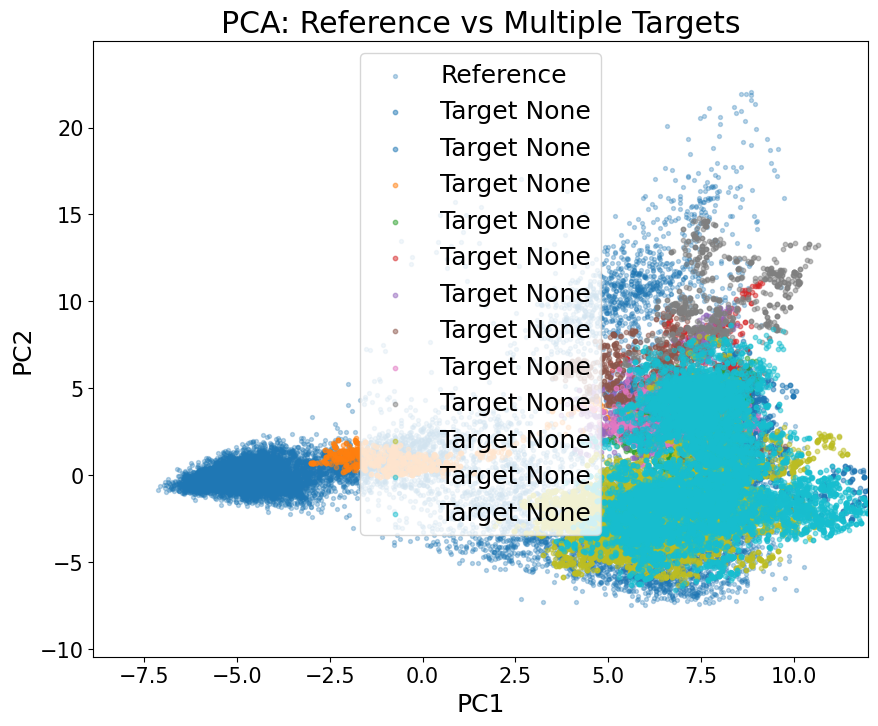

In [11]:
base_dir = os.getcwd() + "/generated_sequences_2Model_PCA_multiple"
print(f"Loading sequences from {base_dir}")
gen_sequences_list, file_names = load_all_generated_sequences_recursive(base_dir)

# Example: visualize one
print(f"Loaded {len(gen_sequences_list)} files")
print(f"Shape of first: {gen_sequences_list[0].shape}, file: {file_names[0]}")

target_coords = extract_target_coords_from_filenames(file_names)

plot_projected_pca_mult(
    sequences_reference=train_sequences,
    list_of_sequences_to_project=gen_sequences_list,
    target_coords_list=target_coords,
    title="PCA: Reference vs Multiple Targets",
    max_pot=21,
    save_path=None,
    restrict_axes=True,
    Nbins=None,
    point_alpha=0.5,
    colors=None
)
